In [1]:
import pandas as pd

df = pd.read_csv('Landhöjning_SMHI_API/Uddevalla.csv', 
                 sep=';',
                 skiprows=11, # instruerar Pandas att hoppa över de första 14 raderna i CSV-filen när den läser in data
                 encoding='utf-8-sig', #spec-tecken som åäö
                 header=0, # första raden efter de som hoppats över anger just KOLUMNNAMNEN
                 skipinitialspace=True) #ignorerar eventuella mellanslag som kan finnas efter avgränsningstecknet ;


# Skriv ut kolumnerna och de första raderna
print(df.columns)
print(df.head())


Index(['År', 'SSP1-1,9 17:e percentil', 'SSP1-1,9 median',
       'SSP1-1,9 83:e percentil', 'SSP1-2,6 17:e percentil', 'SSP1-2,6 median',
       'SSP1-2,6 83:e percentil', 'SSP2-4,5 17:e percentil', 'SSP2-4,5 median',
       'SSP2-4,5 83:e percentil', 'SSP3-7,0 17:e percentil', 'SSP3-7,0 median',
       'SSP3-7,0 83:e percentil', 'SSP5-8,5 17:e percentil', 'SSP5-8,5 median',
       'SSP5-8,5 83:e percentil', 'SSP1-2,6 mindre troligt 17:e percentil',
       'SSP1-2,6 mindre troligt median',
       'SSP1-2,6 mindre troligt 83:e percentil',
       'SSP5-8,5 mindre troligt 17:e percentil',
       'SSP5-8,5 mindre troligt median',
       'SSP5-8,5 mindre troligt 83:e percentil'],
      dtype='object')
     År  SSP1-1,9 17:e percentil  SSP1-1,9 median  SSP1-1,9 83:e percentil  \
0  2030                       -3                6                       16   
1  2040                       -4                8                       20   
2  2050                       -2                9          

In [6]:
max_values = df.max()
print(max_values)


År                                        2150
SSP1-1,9 17:e percentil                     -2
SSP1-1,9 median                             17
SSP1-1,9 83:e percentil                     61
SSP1-2,6 17:e percentil                      2
SSP1-2,6 median                             21
SSP1-2,6 83:e percentil                     59
SSP2-4,5 17:e percentil                     14
SSP2-4,5 median                             47
SSP2-4,5 83:e percentil                     91
SSP3-7,0 17:e percentil                     25
SSP3-7,0 median                             66
SSP3-7,0 83:e percentil                    120
SSP5-8,5 17:e percentil                     38
SSP5-8,5 median                             84
SSP5-8,5 83:e percentil                    146
SSP1-2,6 mindre troligt 17:e percentil       2
SSP1-2,6 mindre troligt median              23
SSP1-2,6 mindre troligt 83:e percentil      61
SSP5-8,5 mindre troligt 17:e percentil      38
SSP5-8,5 mindre troligt median             147
SSP5-8,5 mind

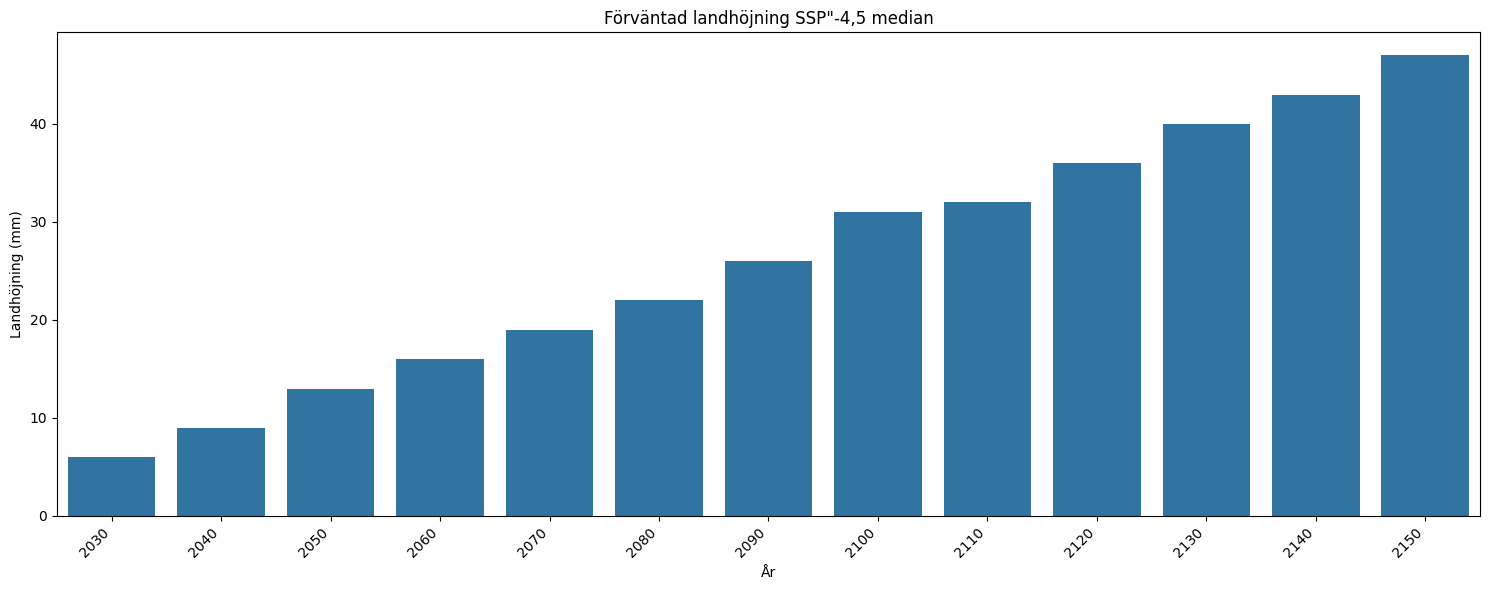

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))  # Öka bredden för bättre läsbarhet
sns.barplot(data=df, x='År', y='SSP2-4,5 median')
plt.title('Förväntad landhöjning i Uddevalla SSP"-4,5 median')
plt.xlabel('År')
plt.ylabel('Landhöjning (mm)')
plt.xticks(rotation=45, ha='right')  # Rotera datumen för bättre läsbarhet
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

fig = px.bar(df, 
             x='År', 
             y='SSP2-4,5 median',
             title='Förväntad landhöjning i Uddevalla - SSP"-4,5 median')

fig.update_traces(hovertemplate='År: %{x}<br>: SSP2-4,5 median%{y:.1f} mm')
fig.update_layout(hovermode='closest')
fig.update_xaxes(dtick=10)  # Detta säkerställer att var 10:e år visas
fig.show()


In [15]:
import plotly.express as px

fig = px.scatter(df, 
                 x='År', 
                 y='SSP2-4,5 median',
                 title='Förväntad landhöjning i Uddevalla - SSP2-4,5 median')

fig.update_traces(marker=dict(size=20))  # Storlek 10 för alla datapunkter
fig.update_traces(hovertemplate='År: %{x}<br>SSP2-4,5 median: %{y:.1f} mm')
fig.update_layout(hovermode='closest')
fig.update_xaxes(dtick=10)  # Detta säkerställer att var 10:e år visas
fig.show()


In [ ]:
# Antag att df är din ursprungliga DataFrame
df_long = pd.melt(df, id_vars=['År'], var_name='Scenario', value_name='Värde')

fig = px.scatter(df_long, 
                 x='År', 
                 y='Värde',
                 color='Scenario',
                 title='Förväntad landhöjning i CM - Uddevalla - Olika scenarier')

fig.update_traces(
    marker=dict(size=10),
    hovertemplate='År: %{x}<br>Höjning: %{y:.0f} cm<br>Scenario: %{customdata}' #br ger ny rad i hover-texten, customdata är en sk platshållare som ersätts med värdet från customdata-attributet för varje punkt
)
fig.update_traces(customdata=df_long['Scenario'])
fig.update_layout(hovermode='closest')
fig.show()


In [30]:
import plotly.express as px
import numpy as np

# Antag att df är din ursprungliga DataFrame
df_long = pd.melt(df, id_vars=['År'], var_name='Scenario', value_name='Värde')

# Lägg till en ny kolumn för storleken som alltid är positiv
df_long['Storlek'] = np.abs(df_long['Värde']) + 1  # Lägger till 1 för att undvika storlek 0

fig = px.scatter(df_long, 
                 x='Scenario', 
                 y='Värde',
                 color='Scenario',
                 animation_frame='År',
                 animation_group='Scenario',
                 size='Storlek',  # Använd den nya kolumnen för storlek
                 size_max=80,
                 hover_name='Scenario',
                 title='Förväntad landhöjning i CM - Uddevalla - Olika scenarier')

fig.update_traces(hovertemplate='År: %{animation_frame}<br>Värde: %{y:.0f} cm<br>Scenario: %{hovertext}')
fig.update_layout(hovermode='closest')

fig.show()


In [38]:
import plotly.express as px
import numpy as np

# Antag att df är din ursprungliga DataFrame
df_long = pd.melt(df, id_vars=['År'], var_name='Scenario', value_name='Värde')

# Lägg till en ny kolumn för storleken som alltid är positiv
df_long['Storlek'] = np.abs(df_long['Värde']) + 1  # Lägger till 1 för att undvika storlek 0

# Byt ut x och y
fig = px.scatter(df_long, 
                 x='År', 
                 y='Värde',
                 color='Scenario',
                 animation_frame='År',
                 animation_group='Scenario',
                 size='Storlek',  
                 size_max=30,
                 hover_name='Scenario',
                 range_x=[df_long['År'].min(), df_long['År'].max()], # för att förstora daiagrammet i sidled
                 range_y=[df_long['Värde'].min(), df_long['Värde'].max()], # för att förstora daiagrammet på höjden
                 title='Förväntad landhöjning i CM - Uddevalla - Olika scenarier')

fig.update_traces(hovertemplate='År: %{x}<br>Scenario: %{hovertext}<br>Värde: %{y:.0f} cm')
fig.update_traces(customdata=df_long['Värde'])
fig.update_layout(hovermode='closest')

fig.show()
